<a href="https://colab.research.google.com/github/jarodchristiansen/PythonProjects/blob/master/Bitcoin_TA_Daily_Prophet_Bokeh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from_symbol = 'BTC'
to_symbol = 'USD'
exchange = 'Bitstamp'
datetime_interval = 'day'

In [16]:
import requests
from datetime import datetime
import pandas as pd
 
 
 
utxo = pd.read_json('utxo-count.json')
hashrate = pd.read_json('hash-rate.json')
fees_per = pd.read_json('fees-usd-per-transaction.json')
difficulty = pd.read_json('difficulty.json')
trade_volume = pd.read_json('trade-volume.json')
transactions_per_block = pd.read_json('n-transactions-per-block.json')
avg_block_size = pd.read_json('avg-block-size.json')

In [61]:
utxo_cleaned = pd.DataFrame()
hashrate_cleaned = pd.DataFrame()
fees_per_cleaned = pd.DataFrame()
difficulty_cleaned = pd.DataFrame()
trade_volume_cleaned = pd.DataFrame()
transactions_per_block_cleaned = pd.DataFrame()
avg_block_size_cleaned = pd.DataFrame()

In [62]:
def unpack(df, df2):
  times = []
  y = []
  for i in df['values']:
    time = i['x']
    value = i['y']
    times.append(time)
    y.append(value)
    #new_time = times
    #new_value = y 
  df2['time'] = times
  df2['y'] = y
  return df2

In [63]:
unpack(utxo, utxo_cleaned)
unpack(hashrate, hashrate_cleaned)
unpack(fees_per, fees_per_cleaned)
unpack(difficulty, difficulty_cleaned)
unpack(trade_volume, trade_volume_cleaned)
unpack(transactions_per_block, transactions_per_block_cleaned)
unpack(avg_block_size, avg_block_size_cleaned)

,time,y
0,1232755200,0.000224
1,1233014400,0.000226
2,1233273600,0.000224
3,1233532800,0.000224
4,1233792000,0.000225
...,...,...
1418,1600300800,1.186136
1419,1600560000,1.178914
1420,1600819200,1.223967
1421,1601078400,1.247271


In [69]:
utxo_cleaned.to_csv('on-chain data/utxo.csv')
hashrate_cleaned.to_csv('on-chain data/hashrate.csv')
fees_per_cleaned.to_csv('on-chain data/fees_per.csv')
difficulty_cleaned.to_csv('on-chain data/difficulty.csv')
trade_volume_cleaned.to_csv('on-chain data/trade_volume.csv')
transactions_per_block_cleaned.to_csv('on-chain data/transactions_per_block.csv')
avg_block_size_cleaned.to_csv('on-chain data/avg_block_size.csv')

In [ ]:
transactions_per_block

,status,name,unit,period,description,values
0,ok,Average Number Of Transactions Per Block,Transactions Per Block,day,The average number of transactions per block.,"{'x': 1232755200, 'y': 1.011248004014655}"
1,ok,Average Number Of Transactions Per Block,Transactions Per Block,day,The average number of transactions per block.,"{'x': 1233014400, 'y': 1.0103751889287511}"
2,ok,Average Number Of Transactions Per Block,Transactions Per Block,day,The average number of transactions per block.,"{'x': 1233273600, 'y': 1.009001522586997}"
3,ok,Average Number Of Transactions Per Block,Transactions Per Block,day,The average number of transactions per block.,"{'x': 1233532800, 'y': 1.006440906022974}"
4,ok,Average Number Of Transactions Per Block,Transactions Per Block,day,The average number of transactions per block.,"{'x': 1233792000, 'y': 1.021040115830384}"
...,...,...,...,...,...,...
1418,ok,Average Number Of Transactions Per Block,Transactions Per Block,day,The average number of transactions per block.,"{'x': 1600300800, 'y': 2017.2183643051685}"
1419,ok,Average Number Of Transactions Per Block,Transactions Per Block,day,The average number of transactions per block.,"{'x': 1600560000, 'y': 1978.4132302611513}"
1420,ok,Average Number Of Transactions Per Block,Transactions Per Block,day,The average number of transactions per block.,"{'x': 1600819200, 'y': 2061.6649684055938}"
1421,ok,Average Number Of Transactions Per Block,Transactions Per Block,day,The average number of transactions per block.,"{'x': 1601078400, 'y': 2165.203953509351}"


In [ ]:
def get_filename(from_symbol, to_symbol, exchange, datetime_interval, download_date):
    return '%s_%s_%s_%s_%s.csv' % (from_symbol, to_symbol, exchange, datetime_interval, download_date)
def download_data(from_symbol, to_symbol, exchange, datetime_interval):
    supported_intervals = {'minute', 'hour', 'day'}
    assert datetime_interval in supported_intervals,\
        'datetime_interval should be one of %s' % supported_intervals
    print('Downloading %s trading data for %s %s from %s' %
          (datetime_interval, from_symbol, to_symbol, exchange))
    base_url = 'https://min-api.cryptocompare.com/data/histo'
    url = '%s%s' % (base_url, datetime_interval)
    params = {'fsym': from_symbol, 'tsym': to_symbol,
              'limit': 2000, 'aggregate': 1,
              'e': exchange}
    request = requests.get(url, params=params)
    data = request.json()
    return data
def convert_to_dataframe(data):
    df = pd.io.json.json_normalize(data, ['Data'])
    df['datetime'] = pd.to_datetime(df.time, unit='s')
    df = df[['datetime', 'low', 'high', 'open',
             'close', 'volumefrom', 'volumeto']]
    return df
def filter_empty_datapoints(df):
    indices = df[df.sum(axis=1) == 0].index
    print('Filtering %d empty datapoints' % indices.shape[0])
    df = df.drop(indices)
    return df
data = download_data(from_symbol, to_symbol, exchange, datetime_interval)
btc = convert_to_dataframe(data)
btc = filter_empty_datapoints(btc)
current_datetime = datetime.now().date().isoformat()
filename = get_filename(from_symbol, to_symbol, exchange, datetime_interval, current_datetime)
print('Saving data to %s' % filename)
btc.to_csv(filename, index=False)

Filtering 0 empty datapoints
Saving data to BTC_USD_Bitstamp_day_2020-10-02.csv


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [ ]:
btc

,datetime,low,high,open,close,volumefrom,volumeto
0,2015-04-12,233.42,237.50,237.34,236.30,2850.16,672985.92
1,2015-04-13,219.64,236.90,236.30,222.87,13823.98,3166493.61
2,2015-04-14,210.00,224.79,222.87,216.42,18432.86,4015453.32
3,2015-04-15,214.05,222.43,216.42,221.51,9766.32,2147063.57
4,2015-04-16,221.51,229.67,221.51,227.59,11002.79,2492640.64
...,...,...,...,...,...,...,...
1996,2020-09-28,10628.52,10950.00,10780.66,10689.48,4991.57,54261165.88
1997,2020-09-29,10636.66,10865.00,10689.48,10836.42,4029.39,43240291.78
1998,2020-09-30,10658.56,10847.50,10836.42,10778.22,4304.62,46247317.60
1999,2020-10-01,10437.08,10940.22,10778.22,10622.71,8678.35,92766078.67


In [ ]:
from_symbol = 'LINK'
to_symbol = 'USD'
exchange = 'Coinbase'
datetime_interval = 'day'


data = download_data(from_symbol, to_symbol, exchange, datetime_interval)
link = convert_to_dataframe(data)
link = filter_empty_datapoints(df)
current_datetime = datetime.now().date().isoformat()
filename = get_filename(from_symbol, to_symbol, exchange, datetime_interval, current_datetime)
print('Saving data to %s' % filename)
link.to_csv(filename, index=False)

Filtering 0 empty datapoints
Saving data to LINK_USD_Coinbase_day_2020-09-28.csv


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [ ]:
from_symbol = 'ETH'
to_symbol = 'USD'
exchange = 'Coinbase'
datetime_interval = 'day'


data = download_data(from_symbol, to_symbol, exchange, datetime_interval)
eth = convert_to_dataframe(data)
eth = filter_empty_datapoints(df)
current_datetime = datetime.now().date().isoformat()
filename = get_filename(from_symbol, to_symbol, exchange, datetime_interval, current_datetime)
print('Saving data to %s' % filename)
eth.to_csv(filename, index=False)

Filtering 0 empty datapoints
Saving data to ETH_USD_Coinbase_day_2020-09-22.csv


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [ ]:
from_symbol = 'XRP'
to_symbol = 'USD'
exchange = 'Coinbase'
datetime_interval = 'day'


data = download_data(from_symbol, to_symbol, exchange, datetime_interval)
xrp = convert_to_dataframe(data)
xrp = filter_empty_datapoints(df)
current_datetime = datetime.now().date().isoformat()
filename = get_filename(from_symbol, to_symbol, exchange, datetime_interval, current_datetime)
print('Saving data to %s' % filename)
xrp.to_csv(filename, index=False)

Filtering 0 empty datapoints
Saving data to XRP_USD_Coinbase_day_2020-09-22.csv


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [ ]:
btc['link'] = link['close']
btc['eth'] = eth['close']
btc['xrp'] = xrp['close']

btc

,datetime,low,high,open,close,volumefrom,volumeto,link,eth,xrp
0,2015-04-02,245.80,255.24,247.25,254.48,9077.69,2.270714e+06,254.48,254.48,254.48
1,2015-04-03,252.59,257.43,254.48,255.68,7141.43,1.820712e+06,255.68,255.68,255.68
2,2015-04-04,251.26,256.60,255.68,254.87,3990.58,1.012944e+06,254.87,254.87,254.87
3,2015-04-05,252.06,262.00,254.87,261.46,5171.58,1.329021e+06,261.46,261.46,261.46
4,2015-04-06,255.00,263.00,261.46,257.57,7405.23,1.919696e+06,257.57,257.57,257.57
...,...,...,...,...,...,...,...,...,...,...
1996,2020-09-18,10813.00,11039.88,10943.61,10937.52,8660.06,9.452144e+07,10937.52,10937.52,10937.52
1997,2020-09-19,10891.78,11179.90,10937.52,11080.00,5715.68,6.310235e+07,11080.00,11080.00,11080.00
1998,2020-09-20,10759.37,11081.37,11080.00,10920.89,6002.89,6.543410e+07,10920.89,10920.89,10920.89
1999,2020-09-21,10180.00,10994.00,10920.89,10416.82,15004.71,1.584192e+08,10416.82,10416.82,10416.82


In [ ]:
import pandas as pd
def read_dataset(filename):
    print('Reading data from %s' % filename)
    df = pd.read_csv(filename)
    # change type from object to datetime
    df.datetime = pd.to_datetime(df.datetime) 
    df = df.set_index('datetime') 
    df = df.sort_index() # sort by datetime
    print(df.shape)
    return df
btc = read_dataset('btc_data.csv')

Reading data from btc_data.csv
(2001, 7)


In [ ]:
btc

,low,high,open,close,volumefrom,volumeto,active
datetime,,,,,,,
2015-04-08,244.29,255.75,255.67,246.65,7572.99,1.888131e+06,2.549510e+05
2015-04-09,239.02,248.16,246.65,243.65,7620.34,1.866760e+06,2.466800e+05
2015-04-10,232.35,244.95,243.65,235.86,11515.72,2.739014e+06,2.574230e+05
2015-04-11,234.77,239.99,235.86,238.13,5674.99,1.346765e+06,2.707330e+05
2015-04-12,234.02,239.16,238.13,238.03,2547.14,6.054664e+05,2.549670e+05
...,...,...,...,...,...,...,...
2020-09-24,10192.56,10795.87,10235.10,10740.01,9678.39,1.017469e+08,9.456470e+05
2020-09-25,10551.00,10765.07,10740.01,10690.53,9688.29,1.033389e+08,1.148102e+06
2020-09-26,10654.58,10828.00,10690.53,10730.00,3783.40,4.056447e+07,9.514440e+05


In [ ]:
!pip install stockstats

In [ ]:
from stockstats import StockDataFrame
df = StockDataFrame.retype(btc)
df['macd'] = df.get('macd') # calculate MACD

NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


In [ ]:
df

,low,high,open,close,volumefrom,volumeto,active,macd,macds,macdh
datetime,,,,,,,,,,
2015-04-08,244.29,255.75,255.67,246.65,7572.99,1.888131e+06,2.549510e+05,0.000000,0.000000,0.000000
2015-04-09,239.02,248.16,246.65,243.65,7620.34,1.866760e+06,2.466800e+05,-0.067308,-0.037393,-0.029915
2015-04-10,232.35,244.95,243.65,235.86,11515.72,2.739014e+06,2.574230e+05,-0.327331,-0.156220,-0.171111
2015-04-11,234.77,239.99,235.86,238.13,5674.99,1.346765e+06,2.707330e+05,-0.355615,-0.223766,-0.131849
2015-04-12,234.02,239.16,238.13,238.03,2547.14,6.054664e+05,2.549670e+05,-0.367477,-0.266516,-0.100960
...,...,...,...,...,...,...,...,...,...,...
2020-09-24,10192.56,10795.87,10235.10,10740.01,9678.39,1.017469e+08,9.456470e+05,-108.369809,-121.873531,13.503722
2020-09-25,10551.00,10765.07,10740.01,10690.53,9688.29,1.033389e+08,1.148102e+06,-97.435791,-116.985983,19.550191
2020-09-26,10654.58,10828.00,10690.53,10730.00,3783.40,4.056447e+07,9.514440e+05,-84.610270,-110.510840,25.900570


In [ ]:
price = df['close']



 
sma_50 = price.rolling(window=50).mean()
sma_100 = price.rolling(window=100).mean()
sma_200 = price.rolling(window=200).mean()
sma_500 = price.rolling(window=500).mean()
 


df['sma50'] = sma_50
df['sma100'] = sma_100
df['sma200'] = sma_200
df['sma500'] = sma_500

In [ ]:
def vol_calc(window_length, series):
  roller = series.rolling(window=window_length)
  volList = roller.std(ddof=0)
  return(volList)

In [ ]:
df['vol_3'] = vol_calc(3, price)
df['vol_12'] = vol_calc(12, price)
df['vol_24']= vol_calc(24, price)

df.head(300)

,low,high,open,close,volumefrom,volumeto,active,macd,macds,macdh,sma50,sma100,sma200,sma500,vol_3,vol_12,vol_24
datetime,,,,,,,,,,,,,,,,,
2015-04-08,244.29,255.75,255.67,246.65,7572.99,1888130.98,254951.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-09,239.02,248.16,246.65,243.65,7620.34,1866760.32,246680.0,-0.067308,-0.037393,-0.029915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-10,232.35,244.95,243.65,235.86,11515.72,2739014.34,257423.0,-0.327331,-0.156220,-0.171111,NaN,NaN,NaN,NaN,4.547383,NaN,NaN
2015-04-11,234.77,239.99,235.86,238.13,5674.99,1346765.36,270733.0,-0.355615,-0.223766,-0.131849,NaN,NaN,NaN,NaN,3.271211,NaN,NaN
2015-04-12,234.02,239.16,238.13,238.03,2547.14,605466.36,254967.0,-0.367477,-0.266516,-0.100960,NaN,NaN,NaN,NaN,1.047314,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-28,377.12,395.00,394.93,379.96,8864.29,3408772.87,522079.0,-10.425789,-9.170538,-1.255251,426.6746,384.8178,318.79910,NaN,6.167854,11.540177,28.773254
2016-01-29,363.25,385.05,379.96,379.39,11940.43,4488371.77,531398.0,-10.930082,-9.522447,-1.407635,425.9388,385.9201,319.23430,NaN,7.195040,11.668861,29.158793
2016-01-30,375.00,382.04,379.39,379.23,4283.56,1623147.42,497442.0,-11.213387,-9.860635,-1.352752,424.4966,386.9532,319.68945,NaN,0.313298,11.940636,29.386531


In [ ]:
df

,low,high,open,close,volumefrom,volumeto,active,macd,macds,macdh,sma50,sma100,sma200,sma500,vol_3,vol_12,vol_24
datetime,,,,,,,,,,,,,,,,,
2015-04-08,244.29,255.75,255.67,246.65,7572.99,1.888131e+06,2.549510e+05,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-09,239.02,248.16,246.65,243.65,7620.34,1.866760e+06,2.466800e+05,-0.067308,-0.037393,-0.029915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-10,232.35,244.95,243.65,235.86,11515.72,2.739014e+06,2.574230e+05,-0.327331,-0.156220,-0.171111,NaN,NaN,NaN,NaN,4.547383,NaN,NaN
2015-04-11,234.77,239.99,235.86,238.13,5674.99,1.346765e+06,2.707330e+05,-0.355615,-0.223766,-0.131849,NaN,NaN,NaN,NaN,3.271211,NaN,NaN
2015-04-12,234.02,239.16,238.13,238.03,2547.14,6.054664e+05,2.549670e+05,-0.367477,-0.266516,-0.100960,NaN,NaN,NaN,NaN,1.047314,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-24,10192.56,10795.87,10235.10,10740.01,9678.39,1.017469e+08,9.456470e+05,-108.369809,-121.873531,13.503722,11178.2024,10437.2182,9222.99885,9139.84666,207.149630,264.556014,429.148660
2020-09-25,10551.00,10765.07,10740.01,10690.53,9688.29,1.033389e+08,1.148102e+06,-97.435791,-116.985983,19.550191,11156.5352,10449.5483,9236.77875,9145.24588,227.253863,239.419096,332.932576
2020-09-26,10654.58,10828.00,10690.53,10730.00,3783.40,4.056447e+07,9.514440e+05,-84.610270,-110.510840,25.900570,11139.0048,10463.0869,9250.95535,9150.29924,21.360273,238.715073,287.512921


In [ ]:
vol_12 = list(df['vol_12'])
vol_3 = list(df['vol_3'])
vol_24 = list(df['vol_24'])

No handles with labels found to put in legend.


0  12304
0.236 11539.124
0.382 11065.938
0.618 10301.062
1  9063


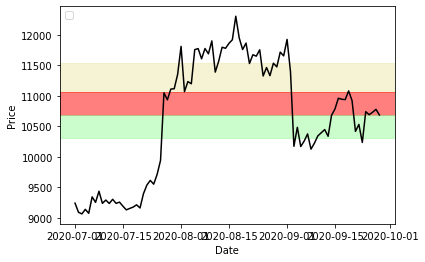

In [ ]:
import matplotlib.pyplot as plt
 
fibs = df['close'][-90::]
 
price_min = fibs.min()
price_max = fibs.max()
 
price_min = int(price_min)
price_min
 
price_max = int(price_max)
price_max
 
 
diff = price_max - price_min

level1 = price_max - 0.236 * diff
level2 = price_max - 0.382 * diff
guide_level = price_max - 0.500 * diff
level3 = price_max - 0.618 * diff
 

print("0 ", price_max)
print("0.236", level1)
print("0.382", level2)
print("0.618", level3)
print("1 ", price_min)
 
 
 
fig, ax = plt.subplots()
ax.plot(btc['close'][-90::], color='black')
ax.axhspan(level2, level1, alpha=0.5, color='palegoldenrod')
ax.axhspan(guide_level, level2, alpha=0.5, color='red')
ax.axhspan(level3, guide_level, alpha=0.5, color='palegreen')

 
plt.ylabel("Price")
plt.xlabel("Date")
plt.legend(loc=2)
plt.show()

# Data for addresses can be found here https://glassnode.com/metrics

In [ ]:
active_addresses = pd.read_json('active-addresses.json')

In [ ]:
active_addresses

,t,v
0,2009-01-03T00:00:00Z,NaN
1,2009-01-04T00:00:00Z,NaN
2,2009-01-05T00:00:00Z,NaN
3,2009-01-06T00:00:00Z,NaN
4,2009-01-07T00:00:00Z,NaN
...,...,...
4281,2020-09-23T00:00:00Z,1016908.0
4282,2020-09-24T00:00:00Z,945647.0
4283,2020-09-25T00:00:00Z,1148102.0
4284,2020-09-26T00:00:00Z,951444.0


In [ ]:
active_addresses.to_csv('addresses.csv')

In [ ]:
btc = pd.read_csv('btc_data.csv')

In [ ]:
btc

,datetime,low,high,open,close,volumefrom,volumeto,active
0,4/8/2015,244.29,255.75,255.67,246.65,7572.99,1.888131e+06,254951.0
1,4/9/2015,239.02,248.16,246.65,243.65,7620.34,1.866760e+06,246680.0
2,4/10/2015,232.35,244.95,243.65,235.86,11515.72,2.739014e+06,257423.0
3,4/11/2015,234.77,239.99,235.86,238.13,5674.99,1.346765e+06,270733.0
4,4/12/2015,234.02,239.16,238.13,238.03,2547.14,6.054664e+05,254967.0
...,...,...,...,...,...,...,...,...
1996,9/24/2020,10192.56,10795.87,10235.10,10740.01,9678.39,1.017469e+08,945647.0
1997,9/25/2020,10551.00,10765.07,10740.01,10690.53,9688.29,1.033389e+08,1148102.0
1998,9/26/2020,10654.58,10828.00,10690.53,10730.00,3783.40,4.056447e+07,951444.0
1999,9/27/2020,10595.24,10806.32,10730.00,10778.20,3880.04,4.159604e+07,786821.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
active = btc['active']



scaler = MinMaxScaler()



btc['scaled_active'] = scaler.fit_transform(btc[["active"]])

In [ ]:
btc['wallets'] = btc['active']

In [ ]:
df

,low,high,open,close,volumefrom,volumeto,active,macd,macds,macdh,sma50,sma100,sma200,sma500,vol_3,vol_12,vol_24
datetime,,,,,,,,,,,,,,,,,
2015-04-08,244.29,255.75,255.67,246.65,7572.99,1.888131e+06,2.549510e+05,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-09,239.02,248.16,246.65,243.65,7620.34,1.866760e+06,2.466800e+05,-0.067308,-0.037393,-0.029915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-10,232.35,244.95,243.65,235.86,11515.72,2.739014e+06,2.574230e+05,-0.327331,-0.156220,-0.171111,NaN,NaN,NaN,NaN,4.547383,NaN,NaN
2015-04-11,234.77,239.99,235.86,238.13,5674.99,1.346765e+06,2.707330e+05,-0.355615,-0.223766,-0.131849,NaN,NaN,NaN,NaN,3.271211,NaN,NaN
2015-04-12,234.02,239.16,238.13,238.03,2547.14,6.054664e+05,2.549670e+05,-0.367477,-0.266516,-0.100960,NaN,NaN,NaN,NaN,1.047314,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-24,10192.56,10795.87,10235.10,10740.01,9678.39,1.017469e+08,9.456470e+05,-108.369809,-121.873531,13.503722,11178.2024,10437.2182,9222.99885,9139.84666,207.149630,264.556014,429.148660
2020-09-25,10551.00,10765.07,10740.01,10690.53,9688.29,1.033389e+08,1.148102e+06,-97.435791,-116.985983,19.550191,11156.5352,10449.5483,9236.77875,9145.24588,227.253863,239.419096,332.932576
2020-09-26,10654.58,10828.00,10690.53,10730.00,3783.40,4.056447e+07,9.514440e+05,-84.610270,-110.510840,25.900570,11139.0048,10463.0869,9250.95535,9150.29924,21.360273,238.715073,287.512921


In [ ]:
df['active_scaled'] = df['active'] / 100 

In [ ]:
df

,low,high,open,close,volumefrom,volumeto,active,macd,macds,macdh,sma50,sma100,sma200,sma500,vol_3,vol_12,vol_24,active_scaled
datetime,,,,,,,,,,,,,,,,,,
2015-04-08,244.29,255.75,255.67,246.65,7572.99,1.888131e+06,2.549510e+05,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2549.510000
2015-04-09,239.02,248.16,246.65,243.65,7620.34,1.866760e+06,2.466800e+05,-0.067308,-0.037393,-0.029915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2466.800000
2015-04-10,232.35,244.95,243.65,235.86,11515.72,2.739014e+06,2.574230e+05,-0.327331,-0.156220,-0.171111,NaN,NaN,NaN,NaN,4.547383,NaN,NaN,2574.230000
2015-04-11,234.77,239.99,235.86,238.13,5674.99,1.346765e+06,2.707330e+05,-0.355615,-0.223766,-0.131849,NaN,NaN,NaN,NaN,3.271211,NaN,NaN,2707.330000
2015-04-12,234.02,239.16,238.13,238.03,2547.14,6.054664e+05,2.549670e+05,-0.367477,-0.266516,-0.100960,NaN,NaN,NaN,NaN,1.047314,NaN,NaN,2549.670000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-24,10192.56,10795.87,10235.10,10740.01,9678.39,1.017469e+08,9.456470e+05,-108.369809,-121.873531,13.503722,11178.2024,10437.2182,9222.99885,9139.84666,207.149630,264.556014,429.148660,9456.470000
2020-09-25,10551.00,10765.07,10740.01,10690.53,9688.29,1.033389e+08,1.148102e+06,-97.435791,-116.985983,19.550191,11156.5352,10449.5483,9236.77875,9145.24588,227.253863,239.419096,332.932576,11481.020000
2020-09-26,10654.58,10828.00,10690.53,10730.00,3783.40,4.056447e+07,9.514440e+05,-84.610270,-110.510840,25.900570,11139.0048,10463.0869,9250.95535,9150.29924,21.360273,238.715073,287.512921,9514.440000


In [ ]:
!pip install bokeh
from bokeh.models import BoxAnnotation
from bokeh.plotting import figure, output_file, show
from bokeh.models import PolyDrawTool
from bokeh.models import ColumnDataSource, Band

TOOLS = "pan,wheel_zoom, poly_draw, box_zoom,reset,save"
source = ColumnDataSource('xs', 'ys')

from math import pi
from bokeh.plotting import figure, show, output_notebook, output_file
output_notebook()
datetime_from = '2015-04-08 00:00'
datetime_to = '2020-09-29 00:00'
def get_candlestick_width(datetime_interval):
    if datetime_interval == 'minute':
        return 30 * 60 * 1000  # half minute in ms
    elif datetime_interval == 'hour':
        return 0.5 * 60 * 60 * 1000  # half hour in ms
    elif datetime_interval == 'day':
        return 12 * 60 * 60 * 1000  # half day in ms
df_limit = df[datetime_from: datetime_to].copy()
inc = df_limit.close > df_limit.open
dec = df_limit.open > df_limit.close
title = '%s datapoints from %s to %s for %s and %s from %s with MACD strategy' % (
    datetime_interval, datetime_from, datetime_to, from_symbol, to_symbol, exchange)
p = figure(x_axis_type="datetime",  plot_width=1500, title=title, tools=TOOLS)
p.line(df_limit.index, df_limit.close, color='black')
# plot macd strategy
p.line(df_limit.index, 0, color='black')
p.line(df_limit.index, df_limit.macd, color='blue')
p.line(df_limit.index, df_limit.macds, color='orange')

low_box = BoxAnnotation(bottom=level1,top=level2, fill_alpha=0.1, fill_color='blue')
mid_box = BoxAnnotation(bottom=level2,top=guide_level, fill_alpha=0.1, fill_color='yellow')
guide_box = BoxAnnotation(bottom=guide_level, fill_alpha=0.1, fill_color='purple')
high_box = BoxAnnotation(bottom=level3, fill_alpha=0.1, fill_color='red')


p.add_layout(low_box)
p.add_layout(mid_box)
p.add_layout(guide_box)
p.add_layout(high_box)

p.xgrid[0].grid_line_color=None
p.ygrid[0].grid_line_alpha=0.5
p.vbar(x=df_limit.index, bottom=[
       0 for _ in df_limit.index], top=df_limit.macdh, width=10, color="purple")
# plot candlesticks
candlestick_width = get_candlestick_width(datetime_interval)
p.segment(df_limit.index, df_limit.high,
          df_limit.index, df_limit.low, color="black")
p.vbar(df_limit.index[inc], candlestick_width, df_limit.open[inc],
       df_limit.close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(df_limit.index[dec], candlestick_width, df_limit.open[dec],
       df_limit.close[dec], fill_color="#F2583E", line_color="black")
p.line(df_limit.index, df_limit.sma50, color='red', line_width=2)
p.line(df_limit.index, df_limit.sma100, color='blue', line_width=3)
p.line(df_limit.index, df_limit.sma200, color='green', line_width=3)
p.line(df_limit.index, df_limit.sma500, color='purple', line_width=3)
p.line(df_limit.index, df_limit.vol_24, color='purple', line_width=3)
p.line(df_limit.index, df_limit.vol_3, color='green', line_width=3)
p.line(df_limit.index, df_limit.active_scaled, color='aqua', line_width=3)


r = p.multi_line(source=source)
tool = PolyDrawTool(renderers=[r])
p.add_tools(tool)


output_file("visualizing_trading_strategy.html", title="visualizing trading strategy")
show(p)


In [ ]:
trading_positions_raw = price - ema_short
trading_positions_raw.tail()

NameError: ignored

In [ ]:
import numpy as np

trading_positions = trading_positions_raw.apply(np.sign) * 1/3
trading_positions.tail()

NameError: ignored

In [ ]:
df

,low,high,open,close,volumefrom,volumeto,macd,macds,macdh,sma50,sma100,sma200,sma500,vol_3,vol_12,vol_24
datetime,,,,,,,,,,,,,,,,
2019-07-02,3.078,3.950,3.456,3.737,9747210.51,35457748.24,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-03,3.444,3.850,3.737,3.491,5765830.58,21100315.48,-0.005519,-0.003066,-0.002453,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-04,3.222,3.610,3.491,3.462,4281577.70,14668308.52,-0.007932,-0.005060,-0.002872,NaN,NaN,NaN,NaN,0.123370,NaN,NaN
2019-07-05,3.410,3.747,3.462,3.650,4530449.50,16337764.22,-0.002047,-0.004040,0.001992,NaN,NaN,NaN,NaN,0.082641,NaN,NaN
2019-07-06,3.455,3.667,3.650,3.486,2546458.72,9042235.58,-0.005332,-0.004424,-0.000908,NaN,NaN,NaN,NaN,0.083544,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-24,7.478,10.430,7.641,9.880,8493218.65,78025271.25,-1.215290,-0.980892,-0.234399,13.39096,9.90188,6.652365,NaN,0.914081,1.286533,1.849855
2020-09-25,9.365,11.230,9.880,10.740,6324215.75,65496469.29,-1.068108,-0.998335,-0.069773,13.40096,9.96765,6.685350,NaN,1.306247,1.168263,1.581091
2020-09-26,9.970,11.090,10.740,10.320,3301766.65,34613307.56,-0.974126,-0.993493,0.019367,13.40436,10.02944,6.716570,NaN,0.351125,0.994127,1.404793


#prophet models to predict the price, this will be a long term and daily predictor. Daily will rely on open price to predict the daily outcome as it is a time dependent feature.

In [ ]:
!pip install sklearn
!pip install fbprophet

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


import statsmodels.api as sm
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df

,low,high,open,close,volumefrom,volumeto,macd,macds,macdh,sma5,sma20,sma50,ema10,ema20,ema50,sma120,ema120
datetime,,,,,,,,,,,,,,,,,
2015-03-30,236.52,248.86,242.19,247.69,7880.41,1929807.46,0.000000,0.000000,0.000000,NaN,NaN,NaN,247.690000,247.690000,247.690000,NaN,247.690000
2015-03-31,238.55,248.59,247.69,243.98,8180.68,1993776.43,-0.083237,-0.046243,-0.036994,NaN,NaN,NaN,247.015455,247.336667,247.544510,NaN,247.628678
2015-04-01,239.32,246.83,243.98,245.98,6106.97,1484287.63,-0.044041,-0.045340,0.001300,NaN,NaN,NaN,246.827190,247.207460,247.483156,NaN,247.601427
2015-04-02,244.52,256.96,245.98,253.16,9880.07,2471179.83,0.234097,0.049320,0.184777,NaN,NaN,NaN,247.978610,247.774369,247.705778,NaN,247.693304
2015-04-03,251.23,256.67,253.16,253.79,5062.49,1286655.62,0.405374,0.155238,0.250136,248.920,NaN,NaN,249.035226,248.347286,247.944375,NaN,247.794076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-15,10611.17,10940.01,10675.15,10783.83,6456.66,69707532.15,-223.015155,-240.490547,17.475393,10526.026,10788.7480,11273.3630,10556.614309,10732.778794,10815.243753,10180.233667,10233.612757
2020-09-16,10662.81,11100.00,10783.83,10951.54,8300.24,90789916.42,-177.370887,-227.866615,50.495728,10637.726,10769.8250,11273.6084,10628.418980,10753.613194,10820.588704,10189.932750,10245.479323
2020-09-17,10739.23,11054.00,10951.54,10940.47,5525.72,60068052.25,-140.471465,-210.387585,69.916121,10737.154,10740.0195,11270.1944,10685.155529,10771.409081,10825.289931,10201.799083,10256.966772


In [ ]:
df.to_csv('btc_w_macd.csv')

In [ ]:
df = pd.read_csv('btc_w_macd.csv')

In [ ]:
df

,datetime,low,high,open,close,volumefrom,volumeto,macd,macds,macdh,sma5,sma20,sma50,ema10,ema20,ema50,sma120,ema120
0,2015-03-30,236.52,248.86,242.19,247.69,7880.41,1929807.46,0.000000,0.000000,0.000000,NaN,NaN,NaN,247.690000,247.690000,247.690000,NaN,247.690000
1,2015-03-31,238.55,248.59,247.69,243.98,8180.68,1993776.43,-0.083237,-0.046243,-0.036994,NaN,NaN,NaN,247.015455,247.336667,247.544510,NaN,247.628678
2,2015-04-01,239.32,246.83,243.98,245.98,6106.97,1484287.63,-0.044041,-0.045340,0.001300,NaN,NaN,NaN,246.827190,247.207460,247.483156,NaN,247.601427
3,2015-04-02,244.52,256.96,245.98,253.16,9880.07,2471179.83,0.234097,0.049320,0.184777,NaN,NaN,NaN,247.978610,247.774369,247.705778,NaN,247.693304
4,2015-04-03,251.23,256.67,253.16,253.79,5062.49,1286655.62,0.405374,0.155238,0.250136,248.920,NaN,NaN,249.035226,248.347286,247.944375,NaN,247.794076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,2020-09-15,10611.17,10940.01,10675.15,10783.83,6456.66,69707532.15,-223.015155,-240.490547,17.475393,10526.026,10788.7480,11273.3630,10556.614309,10732.778794,10815.243753,10180.233667,10233.612757
1997,2020-09-16,10662.81,11100.00,10783.83,10951.54,8300.24,90789916.42,-177.370887,-227.866615,50.495728,10637.726,10769.8250,11273.6084,10628.418980,10753.613194,10820.588704,10189.932750,10245.479323
1998,2020-09-17,10739.23,11054.00,10951.54,10940.47,5525.72,60068052.25,-140.471465,-210.387585,69.916121,10737.154,10740.0195,11270.1944,10685.155529,10771.409081,10825.289931,10201.799083,10256.966772
1999,2020-09-18,10816.54,11040.18,10940.47,10931.20,4398.92,48037947.48,-110.700333,-190.450135,79.749801,10856.438,10712.9940,11266.5760,10729.890887,10786.627263,10829.443267,10217.371833,10268.111123


In [ ]:
s2f_data = pd.read_csv('Bitcoin_Data_With_S2F.csv')

In [ ]:
s2f_data

,ds,open,diff,y,volume,market cap,S2F
0,4/28/2013,135.30,0.00,134.21,0,1.488567e+09,6.864391
1,4/29/2013,134.44,10.33,144.54,0,1.603769e+09,6.985530
2,4/30/2013,144.00,-5.54,139.00,0,1.542813e+09,8.160798
3,5/1/2013,139.00,-22.01,116.99,0,1.298955e+09,8.055411
4,5/2/2013,116.38,-11.78,105.21,0,1.168517e+09,9.080454
...,...,...,...,...,...,...,...
2677,8/26/2020,11366.89,122.22,11488.36,22466660958,2.120000e+11,31.093564
2678,8/27/2020,11485.61,-164.96,11323.40,23240415076,2.090000e+11,46.764867
2679,8/28/2020,11325.30,219.10,11542.50,19807127588,2.130000e+11,52.396465
2680,8/29/2020,11541.05,-35.63,11506.87,17485597759,2.130000e+11,3.828725


In [ ]:
moving_vol = df['volumeto']

moving_vol_10 = moving_vol.rolling(window=10).mean()

In [ ]:
btc = pd.DataFrame()
btc['ds'] = df['datetime']
btc['y'] = df['close']
btc['open'] = df['open']
btc['macd'] = df['macd']
btc['macds'] = df['macds']
btc['moving_vol_10'] = moving_vol_10
btc['S2F'] = s2f_data['S2F']

In [ ]:
btc

,ds,y,open,macd,macds,moving_vol_10,S2F
0,2015-03-30,247.69,242.19,0.000000,0.000000,NaN,6.864391
1,2015-03-31,243.98,247.69,-0.083237,-0.046243,NaN,6.985530
2,2015-04-01,245.98,243.98,-0.044041,-0.045340,NaN,8.160798
3,2015-04-02,253.16,245.98,0.234097,0.049320,NaN,8.055411
4,2015-04-03,253.79,253.16,0.405374,0.155238,NaN,9.080454
...,...,...,...,...,...,...,...
1996,2020-09-15,10783.83,10675.15,-223.015155,-240.490547,6.844282e+07,23.436090
1997,2020-09-16,10951.54,10783.83,-177.370887,-227.866615,7.230232e+07,28.126596
1998,2020-09-17,10940.47,10951.54,-140.471465,-210.387585,6.949019e+07,27.517828
1999,2020-09-18,10931.20,10940.47,-110.700333,-190.450135,6.362957e+07,27.520568


In [ ]:
btc.describe()

,y,open,macd,macds,moving_vol_10,S2F
count,2001.000000,2001.000000,2001.000000,2001.000000,1.992000e+03,2001.000000
mean,4781.802749,4776.405097,37.330340,37.663911,4.897999e+07,15.576021
std,4099.907026,4098.720046,344.165676,324.629818,5.597204e+07,7.589452
min,211.790000,211.790000,-1442.492102,-1257.737861,1.183995e+06,4.991644
25%,610.340000,608.930000,-32.156891,-32.763213,4.530736e+06,9.247678
50%,4053.870000,4040.710000,6.614061,6.303310,3.489222e+07,11.457471
75%,8205.530000,8200.000000,97.260322,94.549196,6.857324e+07,23.333942
max,19187.780000,19187.780000,2537.230185,2280.109007,3.549301e+08,45.686267


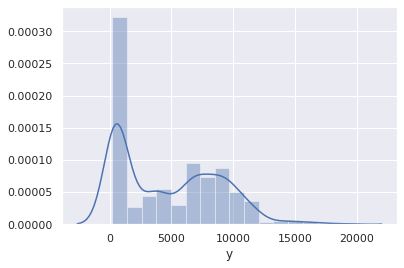

In [ ]:
sns.distplot(btc['y'])

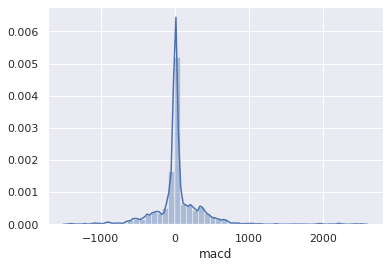

In [ ]:
sns.distplot(btc['macd'])

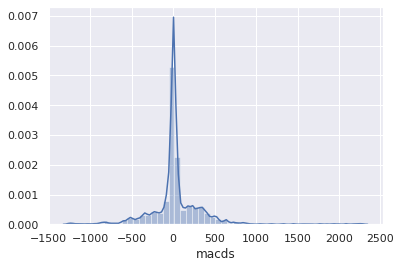

In [ ]:
sns.distplot(btc['macds'])

In [ ]:
btc.to_csv('btc_macd_ema_s2f.csv')

In [ ]:
btc = pd.read_csv('btc_macd_ema_s2f.csv')

In [ ]:
btc['ema'] = df['ema10']

In [ ]:
btc

,ds,y,open,macd,macds,moving_vol_10,S2F,ema
0,2015-03-30,247.69,242.19,0.000000,0.000000,NaN,6.864391,247.690000
1,2015-03-31,243.98,247.69,-0.083237,-0.046243,NaN,6.985530,247.015455
2,2015-04-01,245.98,243.98,-0.044041,-0.045340,NaN,8.160798,246.827190
3,2015-04-02,253.16,245.98,0.234097,0.049320,NaN,8.055411,247.978610
4,2015-04-03,253.79,253.16,0.405374,0.155238,NaN,9.080454,249.035226
...,...,...,...,...,...,...,...,...
1996,2020-09-15,10783.83,10675.15,-223.015155,-240.490547,6.844282e+07,23.436090,10556.614309
1997,2020-09-16,10951.54,10783.83,-177.370887,-227.866615,7.230232e+07,28.126596,10628.418980
1998,2020-09-17,10940.47,10951.54,-140.471465,-210.387585,6.949019e+07,27.517828,10685.155529
1999,2020-09-18,10931.20,10940.47,-110.700333,-190.450135,6.362957e+07,27.520568,10729.890887


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = btc[['y', 'macd', "S2F", 'ema']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i ) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [ ]:
vif

,VIF,features
0,325.162998,y
1,1.585309,macd
2,4.198071,S2F
3,315.581335,ema


In [ ]:
btc_train,btc_test = train_test_split(btc, test_size=0.08, shuffle=False)

In [ ]:
del btc_model

In [ ]:
from fbprophet import Prophet
btc_daily = Prophet(daily_seasonality = True) # the Prophet class (model)
btc_daily.add_regressor('macd')
btc_daily.add_regressor('S2F')
btc_daily.add_regressor('open')
btc_daily.add_regressor('ema')

btc_daily.fit(btc_train) # fit the model using all data

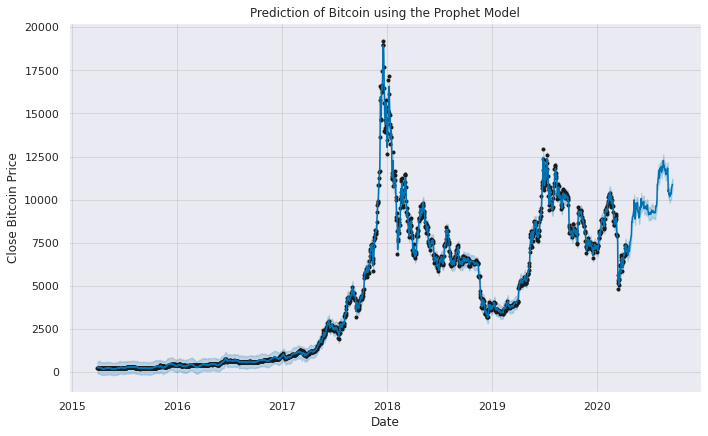

In [ ]:
prediction = btc_daily.predict(btc)
btc_daily.plot(prediction)
plt.title("Prediction of Bitcoin using the Prophet Model")
plt.xlabel("Date")
plt.ylabel("Close Bitcoin Price")
plt.show()

#By limiting the train/test split to 5% the result become much more accurate. I believe this indicates that this model will be better at detecting moderately short term movements (10 days or so). This is most likely due to the windows used for moving average and volatility in the market. Although the results of the 15% split were still moderately accurate, but with a larger spike to 15k. 

#This will impact the range of forecasting this model will produce before a wide range of volatility (potentially 10 day windows will be best?)


#I am undecided if the spike it called for is just being prolonged or if the recent whale moves (sept 2020) artificially delayed the pump to a later time after accumulation. To attempt and predict this I will create a seperate prophet model to predict moving volume and S2F. These will then be combined with the results of the MACD forecaster to make a prediction in this model. Each will need to be refined to reduce loss.  

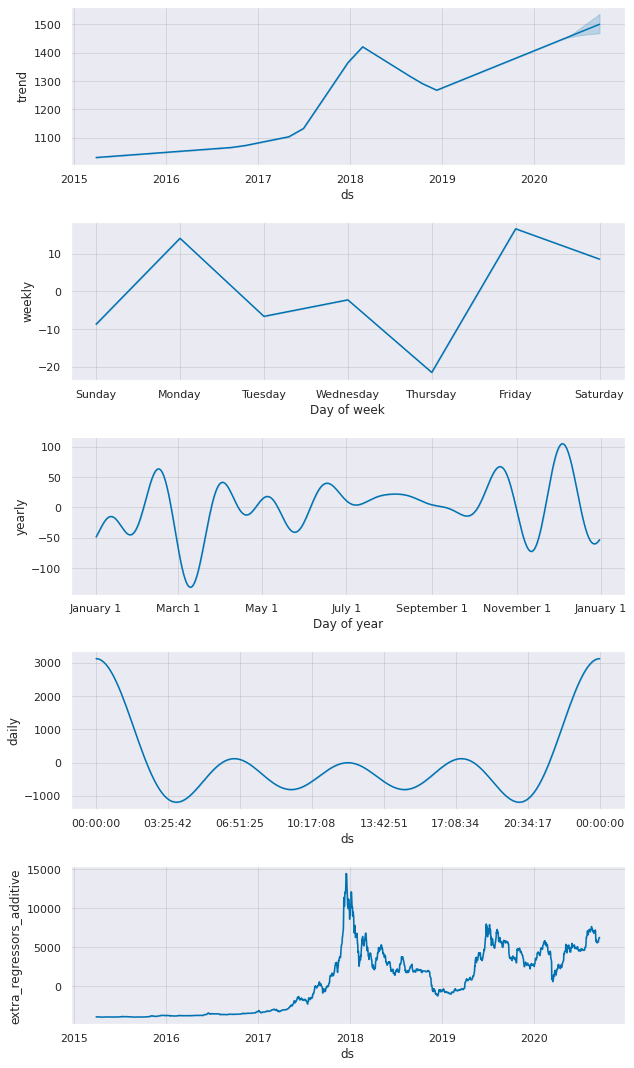

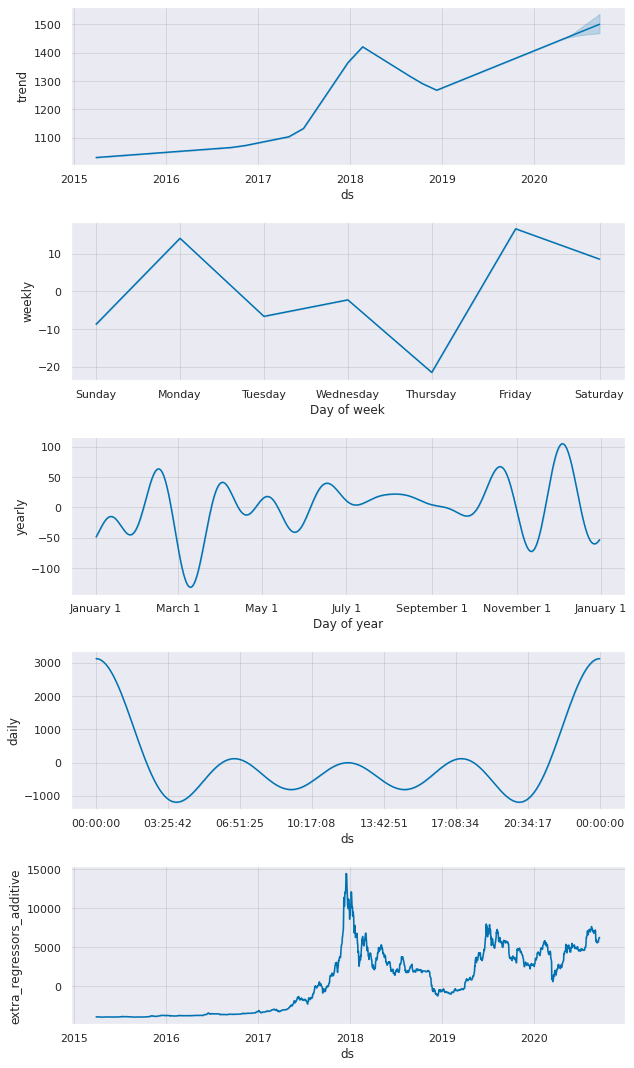

In [ ]:
btc_daily.plot_components(prediction)

In [ ]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,S2F,S2F_lower,S2F_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,ema,ema_lower,ema_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,macd,macd_lower,macd_upper,open,open_lower,open_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-03-30,1030.423236,-58.748106,641.539607,1030.423236,1030.423236,24.622836,24.622836,24.622836,-753.212057,-753.212057,-753.212057,3132.869034,3132.869034,3132.869034,-1127.444793,-1127.444793,-1127.444793,-3932.080403,-3932.080403,-3932.080403,-8.194534,-8.194534,-8.194534,-2821.063912,-2821.063912,-2821.063912,14.043996,14.043996,14.043996,31.955316,31.955316,31.955316,0.0,0.0,0.0,277.211178
1,2015-03-31,1030.488408,-67.719834,634.201535,1030.488408,1030.488408,24.243611,24.243611,24.243611,-766.380805,-766.380805,-766.380805,3132.869034,3132.869034,3132.869034,-1127.631109,-1127.631109,-1127.631109,-3928.888834,-3928.888834,-3928.888834,-8.221635,-8.221635,-8.221635,-2817.279702,-2817.279702,-2817.279702,-6.637118,-6.637118,-6.637118,36.276113,36.276113,36.276113,0.0,0.0,0.0,264.107602
2,2015-04-01,1030.553580,-59.451266,604.057718,1030.553580,1030.553580,20.564432,20.564432,20.564432,-765.272637,-765.272637,-765.272637,3132.869034,3132.869034,3132.869034,-1127.683109,-1127.683109,-1127.683109,-3935.159874,-3935.159874,-3935.159874,-8.208873,-8.208873,-8.208873,-2819.832323,-2819.832323,-2819.832323,-2.268778,-2.268778,-2.268778,39.286981,39.286981,39.286981,0.0,0.0,0.0,265.280943
3,2015-04-02,1030.618752,-111.851123,571.428453,1030.618752,1030.618752,20.894345,20.894345,20.894345,-780.654560,-780.654560,-780.654560,3132.869034,3132.869034,3132.869034,-1127.365075,-1127.365075,-1127.365075,-3933.045294,-3933.045294,-3933.045294,-8.118317,-8.118317,-8.118317,-2818.456247,-2818.456247,-2818.456247,-21.488120,-21.488120,-21.488120,41.009820,41.009820,41.009820,0.0,0.0,0.0,249.964192
4,2015-04-03,1030.683924,-53.862682,643.039311,1030.683924,1030.683924,17.685448,17.685448,17.685448,-740.046919,-740.046919,-740.046919,3132.869034,3132.869034,3132.869034,-1127.073227,-1127.073227,-1127.073227,-3930.966464,-3930.966464,-3930.966464,-8.062552,-8.062552,-8.062552,-2813.516133,-2813.516133,-2813.516133,16.553552,16.553552,16.553552,41.496960,41.496960,41.496960,0.0,0.0,0.0,290.637005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,2020-09-15,1498.846188,10233.203834,10959.176202,1468.473460,1534.322858,-27.254895,-27.254895,-27.254895,9091.584914,9091.584914,9091.584914,3132.869034,3132.869034,3132.869034,1719.984984,1719.984984,1719.984984,5969.136677,5969.136677,5969.136677,-80.804194,-80.804194,-80.804194,4357.210781,4357.210781,4357.210781,-6.637118,-6.637118,-6.637118,-3.783679,-3.783679,-3.783679,0.0,0.0,0.0,10590.431102
1997,2020-09-16,1499.205585,10326.346107,11019.769758,1468.759740,1534.927743,-41.938531,-41.938531,-41.938531,9189.652286,9189.652286,9189.652286,3132.869034,3132.869034,3132.869034,1739.818165,1739.818165,1739.818165,6063.923149,6063.923149,6063.923149,-65.943254,-65.943254,-65.943254,4431.986769,4431.986769,4431.986769,-2.268778,-2.268778,-2.268778,-4.871119,-4.871119,-4.871119,0.0,0.0,0.0,10688.857871
1998,2020-09-17,1499.564983,10468.715789,11173.208870,1468.862544,1535.515999,-40.032783,-40.032783,-40.032783,9314.251859,9314.251859,9314.251859,3132.869034,3132.869034,3132.869034,1755.489377,1755.489377,1755.489377,6208.904768,6208.904768,6208.904768,-53.929476,-53.929476,-53.929476,4547.377650,4547.377650,4547.377650,-21.488120,-21.488120,-21.488120,-6.033823,-6.033823,-6.033823,0.0,0.0,0.0,10813.816842
1999,2020-09-18,1499.924381,10501.936587,11236.516167,1468.804296,1536.123976,-40.041360,-40.041360,-40.041360,9365.50

In [ ]:
!pip install bokeh

In [ ]:
btc['pred_date_2'] = prediction['ds']
btc['full_preds'] = prediction['yhat']

btc.to_csv('btc_s2f_vol_macd_preds.csv')

In [ ]:
btc['full_results'] = btc['y'].sub(btc['full_preds'])

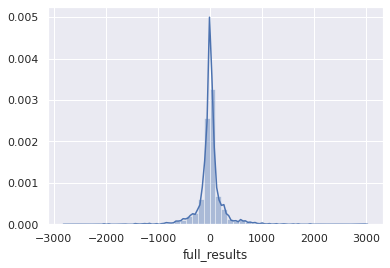

In [ ]:
sns.distplot(btc['full_results'])

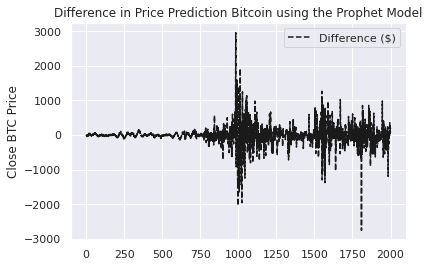

In [ ]:
results = btc['full_results']
plt.figure(); results.plot(style='k--', label='Difference ($)'); plt.legend()
plt.title("Difference in Price Prediction Bitcoin using the Prophet Model")
#plt.xlabel("Date")
plt.ylabel("Close BTC Price")
plt.show()

In [ ]:
btc

,ds,y,open,macd,macds,moving_vol_10,S2F,ema,pred_date_2,full_preds,full_results
0,2015-03-30,247.69,242.19,0.000000,0.000000,NaN,6.864391,247.690000,2015-03-30,277.211178,-29.521178
1,2015-03-31,243.98,247.69,-0.083237,-0.046243,NaN,6.985530,247.015455,2015-03-31,264.107602,-20.127602
2,2015-04-01,245.98,243.98,-0.044041,-0.045340,NaN,8.160798,246.827190,2015-04-01,265.280943,-19.300943
3,2015-04-02,253.16,245.98,0.234097,0.049320,NaN,8.055411,247.978610,2015-04-02,249.964192,3.195808
4,2015-04-03,253.79,253.16,0.405374,0.155238,NaN,9.080454,249.035226,2015-04-03,290.637005,-36.847005
...,...,...,...,...,...,...,...,...,...,...,...
1996,2020-09-15,10783.83,10675.15,-223.015155,-240.490547,6.844282e+07,23.436090,10556.614309,2020-09-15,10590.431102,193.398898
1997,2020-09-16,10951.54,10783.83,-177.370887,-227.866615,7.230232e+07,28.126596,10628.418980,2020-09-16,10688.857871,262.682129
1998,2020-09-17,10940.47,10951.54,-140.471465,-210.387585,6.949019e+07,27.517828,10685.155529,2020-09-17,10813.816842,126.653158
1999,2020-09-18,10931.20,10940.47,-110.700333,-190.450135,6.362957e+07,27.520568,10729.890887,2020-09-18,10865.426639,65.773361


In [ ]:
btc.to_csv('macd_preds_1.csv')

In [ ]:
macd = pd.read_csv('macd_90_day.csv')
macds = pd.read_csv('macds_90_day.csv')

In [ ]:
macd

,Unnamed: 0,ds,macd
0,0,2020-09-13,-2.285816
1,1,2020-09-14,-1.593737
2,2,2020-09-15,-3.378605
3,3,2020-09-16,-4.592652
4,4,2020-09-17,-7.538097
...,...,...,...
85,85,2020-12-07,232.529357
86,86,2020-12-08,253.046931
87,87,2020-12-09,272.495076
88,88,2020-12-10,288.332172


In [ ]:
macds

,Unnamed: 0,ds,macds
0,0,2020-09-13,24.927269
1,1,2020-09-14,23.080833
2,2,2020-09-15,20.464899
3,3,2020-09-16,18.112621
4,4,2020-09-17,15.600698
...,...,...,...
85,85,2020-12-07,158.638485
86,86,2020-12-08,178.401452
87,87,2020-12-09,198.042718
88,88,2020-12-10,216.866016


In [ ]:
future = pd.DataFrame()
future['ds'] = macds['ds']
future['macd'] = macd['macd']
future['macds'] = macds['macds']

In [ ]:
future

,ds,macd,macds
0,2020-09-13,-2.285816,24.927269
1,2020-09-14,-1.593737,23.080833
2,2020-09-15,-3.378605,20.464899
3,2020-09-16,-4.592652,18.112621
4,2020-09-17,-7.538097,15.600698
...,...,...,...
85,2020-12-07,232.529357,158.638485
86,2020-12-08,253.046931,178.401452
87,2020-12-09,272.495076,198.042718
88,2020-12-10,288.332172,216.866016


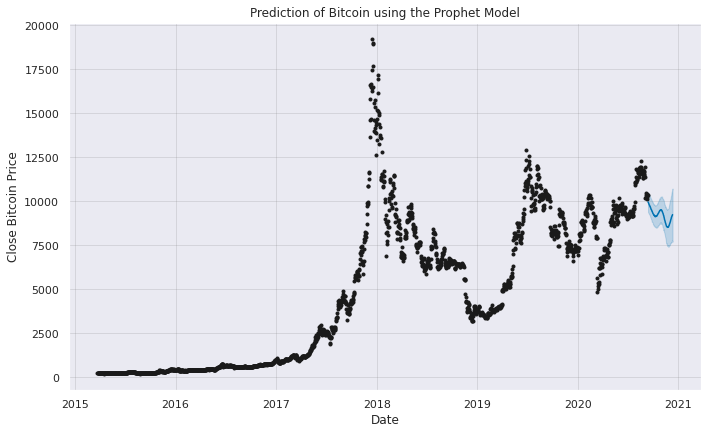

In [ ]:
prediction = btc_model.predict(future)
btc_model.plot(prediction)
plt.title("Prediction of Bitcoin using the Prophet Model")
plt.xlabel("Date")
plt.ylabel("Close Bitcoin Price")
plt.show()

In [ ]:
macd_365 = pd.read_csv('macd_365_day.csv')
macds_365 = pd.read_csv('macds_365_day.csv')

In [ ]:
future_year = pd.DataFrame()
future_year['ds'] = macds_365['ds']
future_year['macd'] = macd_365['macd']
future_year['macds'] = macds_365['macds']

In [ ]:
future_year

,ds,macd,macds
0,2020-09-13,-2.285816,24.927269
1,2020-09-14,-1.593737,23.080833
2,2020-09-15,-3.378605,20.464899
3,2020-09-16,-4.592652,18.112621
4,2020-09-17,-7.538097,15.600698
...,...,...,...
360,2021-09-08,46.985318,82.288787
361,2021-09-09,41.062455,76.868975
362,2021-09-10,37.476613,71.940141
363,2021-09-11,35.211040,67.649030


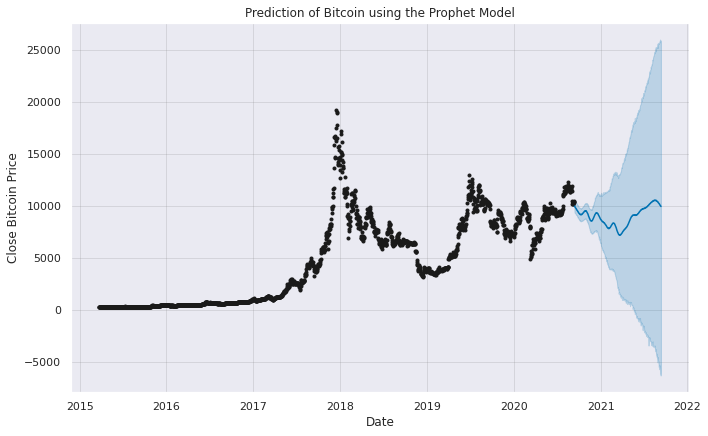

In [ ]:
prediction = btc_model.predict(future_year)
btc_model.plot(prediction)
plt.title("Prediction of Bitcoin using the Prophet Model")
plt.xlabel("Date")
plt.ylabel("Close Bitcoin Price")
plt.show()

In [ ]:
macd_180 = pd.read_csv('macd_180_day.csv')
macds_180 = pd.read_csv('macds_180_day.csv')

In [ ]:
future_6 = pd.DataFrame()
future_6['ds'] = macds_180['ds']
future_6['macd'] = macd_180['macd']
future_6['macds'] = macds_180['macds']

In [ ]:
future_6

,ds,macd,macds
0,2020-09-13,-2.285816,24.927269
1,2020-09-14,-1.593737,23.080833
2,2020-09-15,-3.378605,20.464899
3,2020-09-16,-4.592652,18.112621
4,2020-09-17,-7.538097,15.600698
...,...,...,...
175,2021-03-07,17.917948,66.755723
176,2021-03-08,0.202566,55.442727
177,2021-03-09,-20.839906,41.592955
178,2021-03-10,-41.691321,26.546260


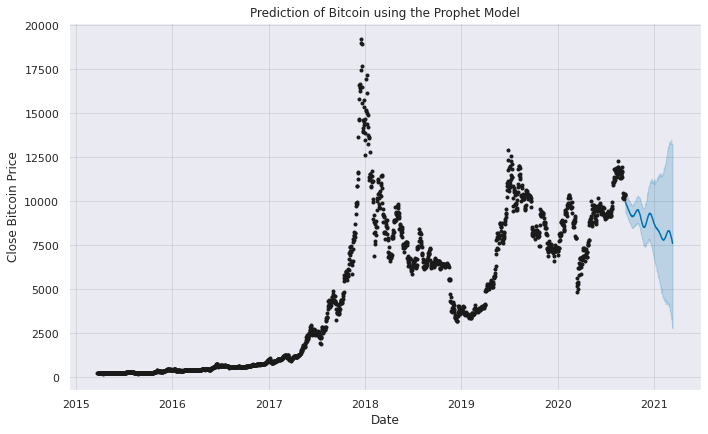

In [ ]:
prediction = btc_model.predict(future_6)
btc_model.plot(prediction)
plt.title("Prediction of Bitcoin using the Prophet Model")
plt.xlabel("Date")
plt.ylabel("Close Bitcoin Price")
plt.show()